# PANDAS
#### Pandas adopts many coding idioms from NumPy, the biggest difference is that pandas is designed for working with tabular or heterogeneous data. NumPy, by contrast, is best suited for working with homogeneous numerical array data.

In [1]:
import pandas as pd
import numpy as np

# Introduction to pandas Data Structures
## Series -
#### A series is 1d array along with data label know as index  
Series is as a fixed-length, ordered dict, as it is a mapping
of index values to data values.

In [2]:
obj = pd.Series([1, 5, 8, 6])
obj

0    1
1    5
2    8
3    6
dtype: int64

In [3]:
print(obj)

0    1
1    5
2    8
3    6
dtype: int64


In [4]:
print(obj.values)
obj.values

[1 5 8 6]


array([1, 5, 8, 6], dtype=int64)

In [5]:
print(obj.index)
obj.index

RangeIndex(start=0, stop=4, step=1)


RangeIndex(start=0, stop=4, step=1)

In [6]:
obj2 = pd.Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])
# creating your own index
obj2

d    4
b    7
a   -5
c    3
dtype: int64

In [7]:
obj2.values

array([ 4,  7, -5,  3], dtype=int64)

In [8]:
obj2.index

Index(['d', 'b', 'a', 'c'], dtype='object')

In [9]:
obj2['b']    # accessing with index names

7

In [10]:
obj2[1]      # accessing with default index

7

In [11]:
obj2[['c', 'b', 'd']]

c    3
b    7
d    4
dtype: int64

In [12]:
obj2[[3, 1, 0]]

c    3
b    7
d    4
dtype: int64

Using NumPy functions or NumPy-like operations, such as filtering with a boolean
array, scalar multiplication, or applying math functions, will preserve the index-value
link:

In [13]:
obj2[obj2 > 2]

d    4
b    7
c    3
dtype: int64

In [14]:
obj2 * 2

d     8
b    14
a   -10
c     6
dtype: int64

In [15]:
obj2

d    4
b    7
a   -5
c    3
dtype: int64

In [16]:
'b' in obj2

True

In [17]:
-5 in obj2

False

With Python dict, you can create a Series

In [18]:
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
obj3 = pd.Series(sdata)   # dict keys -> index ; dict values -> values
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

Keys can also be overwritten -

In [19]:
states = ['California', 'Ohio', 'Oregon', 'Texas']
obj4 = pd.Series(sdata, states)
obj4
# Note California value is NaN (Not a Number) as no key existed in dictionary
# This is "missing data"
# Hence ints were upcasted to floats to accomodate NaN (heterogenous types)
# Also note Utah from sdata was eliminated as no such index was in states

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

we can use isnull and notnull functions in pandas to detect missing data -

In [20]:
pd.isnull(obj4)

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [21]:
pd.notnull(obj4)

California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool

A useful Series feature for many applications is that it automatically aligns by index label in arithmetic operations -

In [22]:
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

In [23]:
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

In [24]:
obj3 + obj4

California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64

Series object itself and its index have a name attribute -

In [25]:
obj4.name = 'population'
obj4.index.name = 'state'

In [26]:
obj4

state
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
Name: population, dtype: float64

A Series’s index can be altered in-place by assignment:

In [27]:
obj

0    1
1    5
2    8
3    6
dtype: int64

In [28]:
obj.index = ['Bob', 'Steve', 'Jeff', 'Ryan']
obj

Bob      1
Steve    5
Jeff     8
Ryan     6
dtype: int64

## DataFrame - 
#### A DataFrame represents a rectangular table of data and contains an ordered collection of columns, each of which can be a different value type (numeric, string, boolean, etc.). The DataFrame has both a row and column index; it can be thought of as a dict of Series all sharing the same index.
DataFrame is physically two-dimensional, you can use it to
represent higher dimensional data in a tabular format using hierarchical
indexing

In [29]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
'year': [2000, 2001, 2002, 2001, 2002, 2003],
'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
frame = pd.DataFrame(data)
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [30]:
print(frame)

    state  year  pop
0    Ohio  2000  1.5
1    Ohio  2001  1.7
2    Ohio  2002  3.6
3  Nevada  2001  2.4
4  Nevada  2002  2.9
5  Nevada  2003  3.2


In [31]:
frame.head()  # gives only 1st 5 rows

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


In [32]:
pd.DataFrame(data,columns=['year', 'state', 'pop'])  
# specifying column order

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9
5,2003,Nevada,3.2


In [33]:
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [34]:
frame2 = pd.DataFrame(data, columns=['year', 'state', 'pop', 'debt'], 
             index=['one', 'two', 'three', 'four', 'five', 'six'])
frame2
# remember index was eliminated in Series but in DataFrame we get ValueError -
# ValueError: Shape of passed values is (6, 4), indices imply (7, 4)
# but if data for column is missing we get NaN for ex. debt

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


In [35]:
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

A column in a DataFrame can be retrieved as a Series either by dict-like notation or by attribute -
+ Note -  
The column returned from indexing a DataFrame is a view on the
underlying data, not a copy. Thus, any in-place modifications to the
Series will be reflected in the DataFrame. The column can be
explicitly copied with the Series’s copy method.

In [36]:
frame2.state

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
six      Nevada
Name: state, dtype: object

In [37]:
frame2['state']

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
six      Nevada
Name: state, dtype: object

Attribute-like access (e.g., frame2.year) and tab completion of column names in IPython is provided as a convenience. frame2[column] works for any column name, but frame2.column only works when the column name is a valid Python variable name.

Rows can also be retrieved by position or name with the special loc attribute -

In [38]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


In [39]:
frame2.loc['two']

year     2001
state    Ohio
pop       1.7
debt      NaN
Name: two, dtype: object

Columns can be modified by assignment. For example, the empty 'debt' column
could be assigned a scalar value or an array of values:

In [40]:
frame2['debt'] = 16.5
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,16.5
two,2001,Ohio,1.7,16.5
three,2002,Ohio,3.6,16.5
four,2001,Nevada,2.4,16.5
five,2002,Nevada,2.9,16.5
six,2003,Nevada,3.2,16.5


In [41]:
frame2['debt'] = np.arange(6.)
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,0.0
two,2001,Ohio,1.7,1.0
three,2002,Ohio,3.6,2.0
four,2001,Nevada,2.4,3.0
five,2002,Nevada,2.9,4.0
six,2003,Nevada,3.2,5.0


When you are assigning lists or arrays to a column, the value’s length must match the length of the DataFrame. If you assign a Series, its labels will be realigned exactly to the DataFrame’s index, inserting missing values in any holes:

In [42]:
val = pd.Series([-1.2, -1.5, -1.7], index=['two', 'four', 'five'])
frame2['debt'] = val   # index is compulsory while assigning Series
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7
six,2003,Nevada,3.2,NaN


Assigning a column that doesn’t exist will create a new column. The del keyword will delete columns as with a dict. New columns cannot be created with the frame2.eastern syntax.

In [43]:
frame2['eastern'] = frame2.state == 'Ohio'
frame2

,year,state,pop,debt,eastern
one,2000,Ohio,1.5,NaN,True
two,2001,Ohio,1.7,-1.2,True
three,2002,Ohio,3.6,NaN,True
four,2001,Nevada,2.4,-1.5,False
five,2002,Nevada,2.9,-1.7,False
six,2003,Nevada,3.2,NaN,False


In [44]:
del frame2['eastern']
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7
six,2003,Nevada,3.2,NaN


#### Note - the column returned from indexing a DataFrame is a view on the underlying data, not a copy. Thus, any in-place modifications to the Series will be reflected in the DataFrame. The column can be explicitly copied with the Series’s copy method.

Another common form of data is a nested dict of dicts:

In [45]:
pop = {'Nevada': {2001: 2.4, 2002: 2.9}, 
       'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}
frame3 = pd.DataFrame(pop)
frame3

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


Also we can pass below to DataFrame constructor -

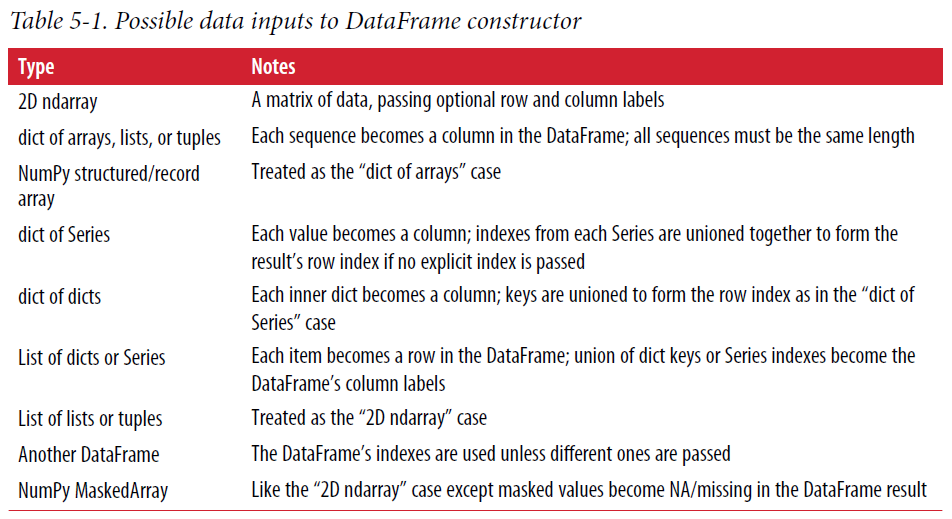

If a DataFrame’s index and columns have their name attributes set, these will also be displayed:

In [46]:
frame3.index.name = 'Year'
frame3.columns.name = 'State'
frame3

State,Nevada,Ohio
Year,,
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


As with Series, the values attribute returns the data contained in the DataFrame as a two-dimensional ndarray:

In [47]:
frame3.values

array([[2.4, 1.7],
       [2.9, 3.6],
       [nan, 1.5]])

If the DataFrame’s columns are different dtypes, the dtype of the values array will be chosen to accommodate all of the columns:

In [48]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7
six,2003,Nevada,3.2,NaN


In [49]:
frame2.values

array([[2000, 'Ohio', 1.5, nan],
       [2001, 'Ohio', 1.7, -1.2],
       [2002, 'Ohio', 3.6, nan],
       [2001, 'Nevada', 2.4, -1.5],
       [2002, 'Nevada', 2.9, -1.7],
       [2003, 'Nevada', 3.2, nan]], dtype=object)

## Index Objects
pandas’s Index objects are responsible for holding the axis labels and other metadata (like the axis name or names). Any array or other sequence of labels you pass when constructing a Series or DataFrame is internally converted to an Index

In [50]:
obj = pd.Series(range(3), index=['a', 'b', 'c'])
obj

a    0
b    1
c    2
dtype: int64

In [51]:
index = obj.index
index

Index(['a', 'b', 'c'], dtype='object')

In [52]:
print(index)

Index(['a', 'b', 'c'], dtype='object')


Index objects are immutable and thus can’t be modified by the user:

In [53]:
# index[1] = 'd' # TypeError - Index does not support mutable operations

Immutability makes it safer to share Index objects among data structures:

In [54]:
labels = pd.Index(np.arange(3))
labels

Int64Index([0, 1, 2], dtype='int64')

In [55]:
obj2 = pd.Series([1.5, -2.5, 0], index=labels)
obj2

0    1.5
1   -2.5
2    0.0
dtype: float64

In [56]:
obj2.index is labels

True

In addition to being array-like, an Index also behaves like a fixed-size set:

In [57]:
frame3

State,Nevada,Ohio
Year,,
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


In [58]:
frame3.index

Int64Index([2001, 2002, 2000], dtype='int64', name='Year')

In [59]:
frame3.columns

Index(['Nevada', 'Ohio'], dtype='object', name='State')

In [60]:
'Ohio' in frame3.columns

True

In [61]:
2000 in frame3.index

True

Unlike Python sets, a pandas Index can contain duplicate labels. Selections with duplicate labels will select all occurrences of that label.:

In [62]:
dup_labels = pd.Index(['foo', 'foo', 'bar', 'bar'])
dup_labels

Index(['foo', 'foo', 'bar', 'bar'], dtype='object')

Each Index has a number of methods and properties for set logic, which answer other common questions about the data it contains. Some useful ones are summarized in  
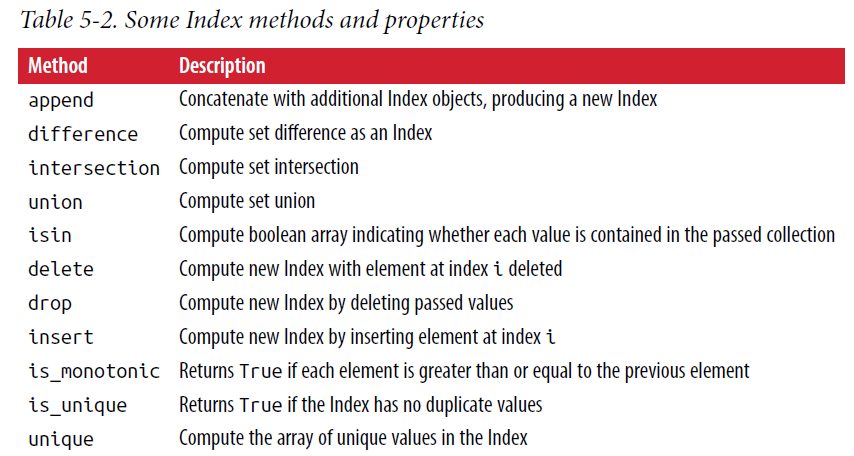

# Essential Functionalities -
## Reindexing
An important method on pandas objects is reindex, which means to create a new object with the data conformed to a new index.

In [63]:
obj = pd.Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'])
obj

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

In [64]:
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e'])
obj2

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64

In [65]:
obj

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

For ordered data like time series, it may be desirable to do some interpolation or filling of values when reindexing. The method option allows us to do this, using a method such as ffill, which forward-fills the values:

In [66]:
obj3 = pd.Series(['yellow', 'orange', 'purple'], index=[0, 2, 4])
obj3

0    yellow
2    orange
4    purple
dtype: object

In [67]:
obj4 = obj3.reindex(np.arange(6), method = 'ffill')
obj4

0    yellow
1    yellow
2    orange
3    orange
4    purple
5    purple
dtype: object

In [68]:
obj3

0    yellow
2    orange
4    purple
dtype: object

With DataFrame, reindex can alter either the (row) index, columns, or both. When passed only a sequence, it reindexes the rows in the result:

In [69]:
frame = pd.DataFrame(np.arange(9).reshape(3,3), index = ['a', 'c', 'd'],
                    columns = ['Goa','Kerela','Assam'])
frame

,Goa,Kerela,Assam
a,0,1,2
c,3,4,5
d,6,7,8


In [70]:
frame2 = frame.reindex(['a', 'b', 'c', 'd'])
frame2

,Goa,Kerela,Assam
a,0.0,1.0,2.0
b,NaN,NaN,NaN
c,3.0,4.0,5.0
d,6.0,7.0,8.0


In [71]:
frame

,Goa,Kerela,Assam
a,0,1,2
c,3,4,5
d,6,7,8


The columns can be reindexed with the columns keyword:

In [72]:
states = ['Goa', 'Sikkim','Kerela']
frame3 = frame.reindex(columns=states)
frame3

,Goa,Sikkim,Kerela
a,0,NaN,1
c,3,NaN,4
d,6,NaN,7


More about the arguments to reindex -
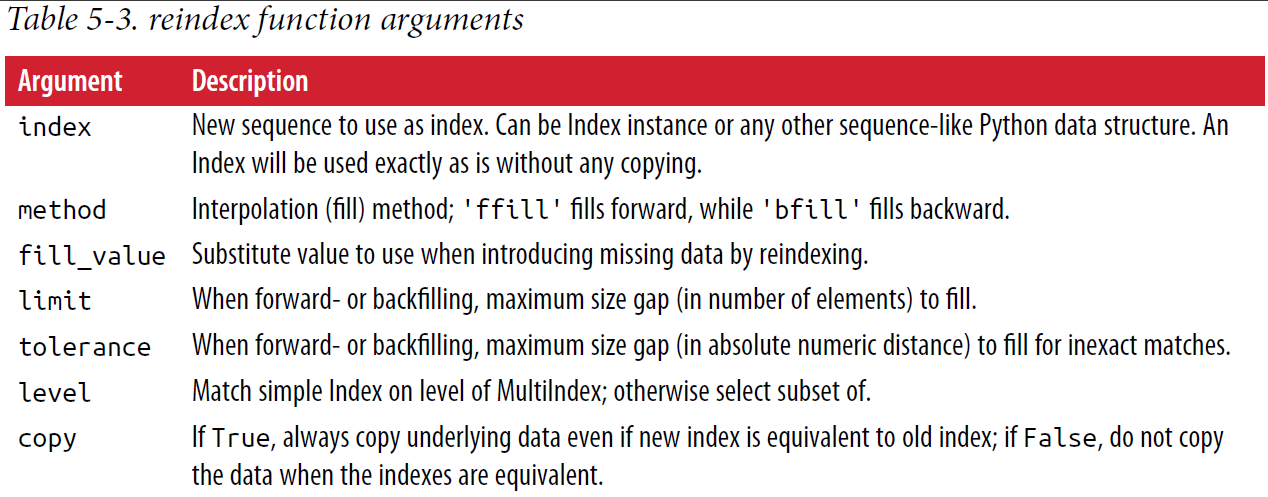

you can reindex more succinctly by label-indexing with loc (frequently used) -

In [73]:
frame

,Goa,Kerela,Assam
a,0,1,2
c,3,4,5
d,6,7,8


In [74]:
frame.loc[['d', 'a', 'c'], ['Goa','Assam','Kerela']]

,Goa,Assam,Kerela
d,6,8,7
a,0,2,1
c,3,5,4


In [75]:
frame

,Goa,Kerela,Assam
a,0,1,2
c,3,4,5
d,6,7,8


## Dropping Entries from an Axis

Dropping one or more entries from an axis is easy if you already have an index array or list without those entries. As that can require a bit of munging and set logic, the drop method will return a new object with the indicated value or values deleted from an axis:

In [76]:
obj = pd.Series(np.arange(5.), index=['a', 'b', 'c', 'd', 'e'])
obj

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

In [77]:
new_obj = obj.drop('c')
new_obj

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

In [78]:
obj

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

In [79]:
obj.drop(['d', 'c'])

a    0.0
b    1.0
e    4.0
dtype: float64

With DataFrame, index values can be deleted from either axis:

In [80]:
data = pd.DataFrame(np.arange(16).reshape(4,4), 
                    index=['Assam', 'Sikkim', 'Goa', 'Kerela'],
                   columns = ['one', 'two', 'three', 'four'])
data

,one,two,three,four
Assam,0,1,2,3
Sikkim,4,5,6,7
Goa,8,9,10,11
Kerela,12,13,14,15


Calling drop with a sequence of labels will drop values from the row labels (axis 0):

In [81]:
data.drop(['Goa','Assam'])

,one,two,three,four
Sikkim,4,5,6,7
Kerela,12,13,14,15


You can drop values from the columns by passing axis=1 or axis='columns':

In [82]:
data.drop('two',axis=1)

,one,three,four
Assam,0,2,3
Sikkim,4,6,7
Goa,8,10,11
Kerela,12,14,15


In [83]:
data.drop(['two', 'three'],axis='columns')

,one,four
Assam,0,3
Sikkim,4,7
Goa,8,11
Kerela,12,15


In [84]:
data

,one,two,three,four
Assam,0,1,2,3
Sikkim,4,5,6,7
Goa,8,9,10,11
Kerela,12,13,14,15


Many functions, like drop, which modify the size or shape of a Series or DataFrame, can manipulate an object in-place without returning a new object:  
Be careful with the inplace, as it destroys any data that is dropped.

In [85]:
data.drop(['Goa'], inplace=True)
data

,one,two,three,four
Assam,0,1,2,3
Sikkim,4,5,6,7
Kerela,12,13,14,15


## Indexing, Selection, and Filtering

Series indexing (obj[...]) works analogously to NumPy array indexing, except you can use the Series’s index values instead of only integers. Here are some examples of this:

In [86]:
obj = pd.Series(np.arange(5.),index=['a','b','c','d','e'])
obj

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

In [87]:
obj['b']

1.0

In [88]:
obj[1]

1.0

In [89]:
obj[-1]

4.0

In [90]:
obj[2:4]

c    2.0
d    3.0
dtype: float64

In [91]:
obj['a':'c']
# note difference between above and this slicing, here end is also included

a    0.0
b    1.0
c    2.0
dtype: float64

In [92]:
obj[['a','d']]

a    0.0
d    3.0
dtype: float64

In [93]:
obj[[0,3]]

a    0.0
d    3.0
dtype: float64

In [94]:
obj[obj<2]

a    0.0
b    1.0
dtype: float64

Setting using these methods modifies the corresponding section of the Series:

In [95]:
obj[obj<2] = 3
obj

a    3.0
b    3.0
c    2.0
d    3.0
e    4.0
dtype: float64

Indexing into a DataFrame is for retrieving one or more columns either with a single value or sequence:

In [96]:
data = pd.DataFrame(np.arange(16).reshape(4,4), 
                    index=['Assam', 'Sikkim', 'Goa', 'Kerela'],
                   columns = ['one', 'two', 'three', 'four'])
data

,one,two,three,four
Assam,0,1,2,3
Sikkim,4,5,6,7
Goa,8,9,10,11
Kerela,12,13,14,15


In [97]:
data['two']

Assam      1
Sikkim     5
Goa        9
Kerela    13
Name: two, dtype: int32

In [98]:
data[['three','one']]

,three,one
Assam,2,0
Sikkim,6,4
Goa,10,8
Kerela,14,12


In [99]:
print(data[['three','one']])

        three  one
Assam       2    0
Sikkim      6    4
Goa        10    8
Kerela     14   12


In [100]:
data[:2]

,one,two,three,four
Assam,0,1,2,3
Sikkim,4,5,6,7


In [101]:
data[:2][['three','one']]

,three,one
Assam,2,0
Sikkim,6,4


In [102]:
data[data['three']>5]

,one,two,three,four
Sikkim,4,5,6,7
Goa,8,9,10,11
Kerela,12,13,14,15


Another use case is in indexing with a boolean DataFrame, such as one produced by a scalar comparison:

In [103]:
data < 5

,one,two,three,four
Assam,True,True,True,True
Sikkim,True,False,False,False
Goa,False,False,False,False
Kerela,False,False,False,False


In [104]:
data[data<5]

,one,two,three,four
Assam,0.0,1.0,2.0,3.0
Sikkim,4.0,NaN,NaN,NaN
Goa,NaN,NaN,NaN,NaN
Kerela,NaN,NaN,NaN,NaN


In [105]:
data

,one,two,three,four
Assam,0,1,2,3
Sikkim,4,5,6,7
Goa,8,9,10,11
Kerela,12,13,14,15


In [106]:
data[data<5]=0
data

,one,two,three,four
Assam,0,0,0,0
Sikkim,0,5,6,7
Goa,8,9,10,11
Kerela,12,13,14,15


## Selection with loc and iloc

For DataFrame label-indexing on the rows, there are special indexing operators loc and iloc. They enable you to select a subset of the rows and columns from a DataFrame with NumPy-like notation using either axis labels (loc) or integers (iloc):

In [107]:
data

,one,two,three,four
Assam,0,0,0,0
Sikkim,0,5,6,7
Goa,8,9,10,11
Kerela,12,13,14,15


In [108]:
data.loc['Goa',['two', 'three']]

two       9
three    10
Name: Goa, dtype: int32

Similar selections with integers using iloc:

In [109]:
data.iloc[2,[1, 2]]

two       9
three    10
Name: Goa, dtype: int32

In [110]:
data.iloc[2,[-1, 2]]

four     11
three    10
Name: Goa, dtype: int32

In [111]:
data.iloc[1]

one      0
two      5
three    6
four     7
Name: Sikkim, dtype: int32

In [112]:
data.iloc[:,1]

Assam      0
Sikkim     5
Goa        9
Kerela    13
Name: two, dtype: int32

In [113]:
data.loc[:,'two']

Assam      0
Sikkim     5
Goa        9
Kerela    13
Name: two, dtype: int32

In [114]:
data

,one,two,three,four
Assam,0,0,0,0
Sikkim,0,5,6,7
Goa,8,9,10,11
Kerela,12,13,14,15


In [115]:
data.iloc[[1, 2], [3, 0, 1]]

,four,one,two
Sikkim,7,0,5
Goa,11,8,9


In [116]:
data.loc[:'Goa', 'two':'four']  # note end of silce included

,two,three,four
Assam,0,0,0
Sikkim,5,6,7
Goa,9,10,11


In [117]:
data

,one,two,three,four
Assam,0,0,0,0
Sikkim,0,5,6,7
Goa,8,9,10,11
Kerela,12,13,14,15


In [118]:
data.iloc[:, :3][data.three > 5]

,one,two,three
Sikkim,0,5,6
Goa,8,9,10
Kerela,12,13,14


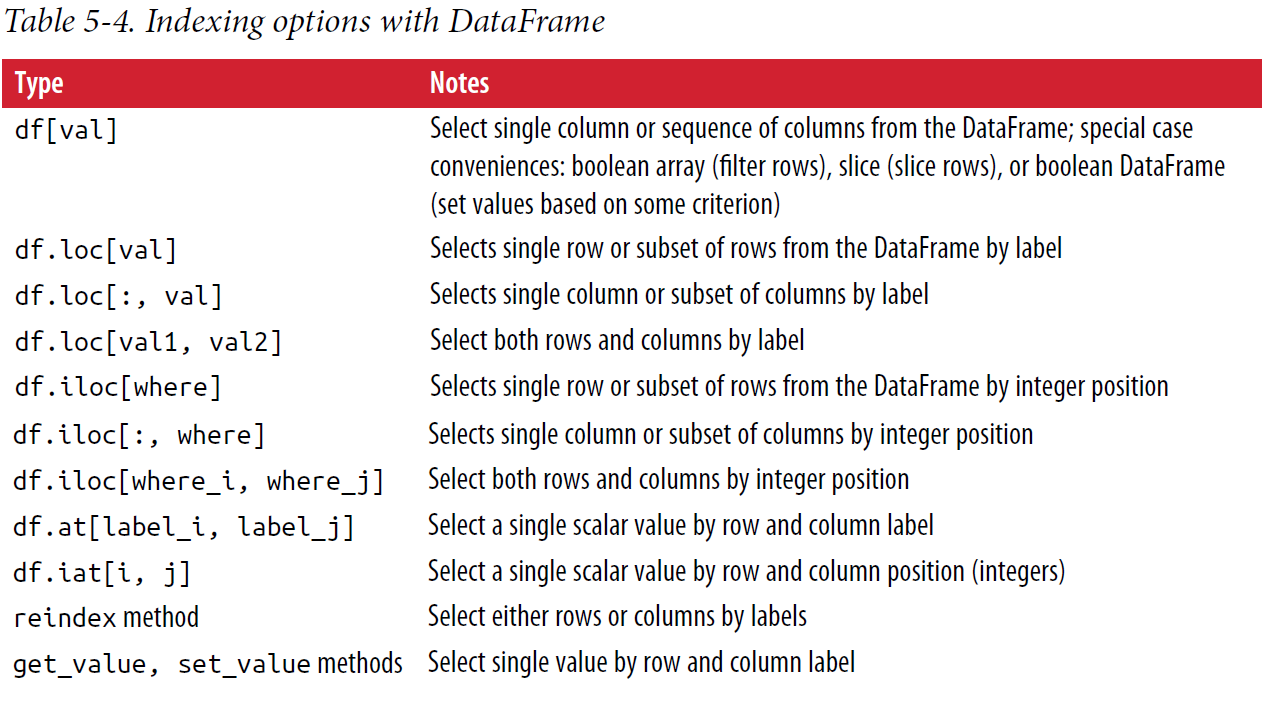

## Integer Indexes

In [119]:
ser = pd.Series(np.arange(3.))
ser

0    0.0
1    1.0
2    2.0
dtype: float64

In [120]:
# ser[-1]
# ValueError: -1 is not in range ; KeyError: -1
# from panda's perspective this is ambiguious as it won't understand 
# whether the user wants label-based indexing or position-based

On the other hand, with a non-integer index, there is no potential for ambiguity:

In [121]:
ser2 = pd.Series(np.arange(3.),index=['a','b','c'])
ser2

a    0.0
b    1.0
c    2.0
dtype: float64

In [122]:
ser2[-1]

2.0

In [123]:
ser3 = pd.Series(np.arange(3.),index=[-1,2,1])
ser3

-1    0.0
 2    1.0
 1    2.0
dtype: float64

In [124]:
ser3[-1]

0.0

To keep things consistent, if you have an axis index containing integers, data selection will always be label-oriented. For more precise handling, use loc (for labels) or iloc (for integers):

In [125]:
ser

0    0.0
1    1.0
2    2.0
dtype: float64

In [126]:
ser[:1]

0    0.0
dtype: float64

In [127]:
ser.loc[:1]

0    0.0
1    1.0
dtype: float64

In [128]:
ser.iloc[:1]

0    0.0
dtype: float64

## Arithmetic and Data Alignment
When you are adding together objects, if any index pairs are not the same, the respective index in the result will be the union of the index pairs.  
this is similar to an automatic outer join on the index labels in database

In [129]:
s1 = pd.Series([7.3, -2.5, 3.4, 1.5], index=['a', 'c', 'd', 'e'])
s1

a    7.3
c   -2.5
d    3.4
e    1.5
dtype: float64

In [130]:
s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1], index=['a', 'c', 'e', 'f', 'g'])
s2

a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64

The internal data alignment introduces missing values in the label locations that don’t overlap. Missing values will then propagate in further arithmetic computations.

In [131]:
s1 + s2

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

In the case of DataFrame, alignment is performed on both the rows and the columns:

In [132]:
df1 = pd.DataFrame(np.arange(9.).reshape((3, 3)), columns=list('bcd'), 
                   index=['Goa', 'Kerela', 'Sikkim'])
df1

,b,c,d
Goa,0.0,1.0,2.0
Kerela,3.0,4.0,5.0
Sikkim,6.0,7.0,8.0


In [133]:
df2 = pd.DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'), 
                   index=['Assam', 'Goa', 'Kerela', 'Bihar'])
df2

,b,d,e
Assam,0.0,1.0,2.0
Goa,3.0,4.0,5.0
Kerela,6.0,7.0,8.0
Bihar,9.0,10.0,11.0


In [134]:
df1 + df2   # note indexes and columns are sorted here

,b,c,d,e
Assam,NaN,NaN,NaN,NaN
Bihar,NaN,NaN,NaN,NaN
Goa,3.0,NaN,6.0,NaN
Kerela,9.0,NaN,12.0,NaN
Sikkim,NaN,NaN,NaN,NaN


Since the 'c' and 'e' columns are not found in both DataFrame objects, they appear as all missing in the result. The same holds for the rows whose labels are not common to both objects.  
Thus if you add DataFrame objects with no column or row labels in common, the result will contain all nulls:

In [135]:
df1 = pd.DataFrame({'A': [1, 2]})
df1

,A
0,1
1,2


In [136]:
df2 = pd.DataFrame({'B': [3, 4]})
df2

,B
0,3
1,4


In [137]:
df1 + df2

,A,B
0,NaN,NaN
1,NaN,NaN


## Arithmetic methods with fill values

In arithmetic operations between differently indexed objects, you might want to fill with a special value, like 0, when an axis label is found in one object but not the other:

In [138]:
df1 = pd.DataFrame(np.arange(12.).reshape(3,4), columns = list('abcd'))
df1

,a,b,c,d
0,0.0,1.0,2.0,3.0
1,4.0,5.0,6.0,7.0
2,8.0,9.0,10.0,11.0


In [139]:
df2 = pd.DataFrame(np.arange(20.).reshape(4,5), columns = list('abcde'))
df2

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.0,8.0,9.0
2,10.0,11.0,12.0,13.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [140]:
df2.loc[1, 'b'] = np.nan
df2

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,4.0
1,5.0,NaN,7.0,8.0,9.0
2,10.0,11.0,12.0,13.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [141]:
df1 + df2

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,NaN
1,9.0,NaN,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


Using the add method on df1, I pass df2 and an argument to fill_value:

In [142]:
df1.add(df2, fill_value=0)   
# All the NaN cells has been filled with fill_value and 
# then addition is performed

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,5.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


Series and DataFrame methods for arithmetic -  
 
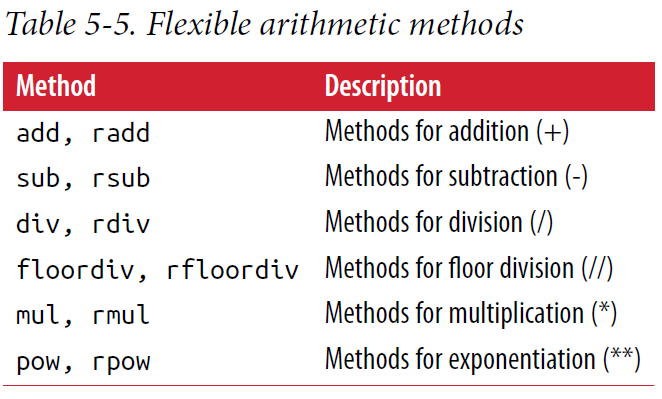

Each of them has a counterpart, starting with the letter r, that has arguments flipped.  
Hence below 1 are same operations

In [143]:
1 / df1

,a,b,c,d
0,inf,1.000000,0.500000,0.333333
1,0.250,0.200000,0.166667,0.142857
2,0.125,0.111111,0.100000,0.090909


In [144]:
df1.rdiv(1)

,a,b,c,d
0,inf,1.000000,0.500000,0.333333
1,0.250,0.200000,0.166667,0.142857
2,0.125,0.111111,0.100000,0.090909


In [145]:
df1

,a,b,c,d
0,0.0,1.0,2.0,3.0
1,4.0,5.0,6.0,7.0
2,8.0,9.0,10.0,11.0


when reindexing a Series or DataFrame, you can also specify a different fill value:

In [146]:
df2

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,4.0
1,5.0,NaN,7.0,8.0,9.0
2,10.0,11.0,12.0,13.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [147]:
df1.reindex(columns = df2.columns, fill_value=0)

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,0
1,4.0,5.0,6.0,7.0,0
2,8.0,9.0,10.0,11.0,0


## Operations between DataFrame and Series

Lets 1st see what nump does when we subtract 1d array from 2d -

In [148]:
arr = np.arange(12.).reshape(3,4)
arr

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.]])

In [149]:
arr[0]

array([0., 1., 2., 3.])

When we subtract arr[0] from arr, the subtraction is performed once for each row. This is referred to as broadcasting -

In [150]:
arr - arr[0]

array([[0., 0., 0., 0.],
       [4., 4., 4., 4.],
       [8., 8., 8., 8.]])

In [151]:
arr[0] - arr

array([[ 0.,  0.,  0.,  0.],
       [-4., -4., -4., -4.],
       [-8., -8., -8., -8.]])

Operations between a DataFrame and a Series are similar:

In [152]:
frame = pd.DataFrame(np.arange(12.).reshape(4,3), columns = list('bde'),
                   index = ['Assam','Goa','Sikkim','Kerela'])
frame

,b,d,e
Assam,0.0,1.0,2.0
Goa,3.0,4.0,5.0
Sikkim,6.0,7.0,8.0
Kerela,9.0,10.0,11.0


In [153]:
series = frame.iloc[0]
series

b    0.0
d    1.0
e    2.0
Name: Assam, dtype: float64

Arithmetic between DataFrame and Series matches the index of the Series
on the DataFrame’s columns, broadcasting down the rows -

In [154]:
frame - series

,b,d,e
Assam,0.0,0.0,0.0
Goa,3.0,3.0,3.0
Sikkim,6.0,6.0,6.0
Kerela,9.0,9.0,9.0


In [155]:
series - frame

,b,d,e
Assam,0.0,0.0,0.0
Goa,-3.0,-3.0,-3.0
Sikkim,-6.0,-6.0,-6.0
Kerela,-9.0,-9.0,-9.0


If an index value is not found in either the DataFrame’s columns or the Series’s index, the objects will be reindexed to form the union:

In [156]:
series2 = pd.Series(np.arange(3.),index = list('bef'))
series2

b    0.0
e    1.0
f    2.0
dtype: float64

In [157]:
frame

,b,d,e
Assam,0.0,1.0,2.0
Goa,3.0,4.0,5.0
Sikkim,6.0,7.0,8.0
Kerela,9.0,10.0,11.0


In [158]:
frame + series2

,b,d,e,f
Assam,0.0,NaN,3.0,NaN
Goa,3.0,NaN,6.0,NaN
Sikkim,6.0,NaN,9.0,NaN
Kerela,9.0,NaN,12.0,NaN


If you want to instead broadcast over the columns, matching on the rows, you have to use one of the arithmetic methods.For example:

In [159]:
series3 = frame.d   # or series3 = frame['d']
series3

Assam      1.0
Goa        4.0
Sikkim     7.0
Kerela    10.0
Name: d, dtype: float64

In [160]:
frame

,b,d,e
Assam,0.0,1.0,2.0
Goa,3.0,4.0,5.0
Sikkim,6.0,7.0,8.0
Kerela,9.0,10.0,11.0


In [161]:
frame.sub(series3,axis='index')

,b,d,e
Assam,-1.0,0.0,1.0
Goa,-1.0,0.0,1.0
Sikkim,-1.0,0.0,1.0
Kerela,-1.0,0.0,1.0


The axis number that you pass is the axis to match on. In this case we mean to match
on the DataFrame’s row index (axis='index' or axis=0) and broadcast across.

## Function Application and Mapping

NumPy ufuncs (element-wise array methods) also work with pandas objects:

In [162]:
frame = pd.DataFrame(np.random.randn(4,3), columns = list('bde'),
                   index = ['Assam','Goa','Sikkim','Kerela'])
frame

,b,d,e
Assam,0.572896,1.263468,-0.819654
Goa,0.059071,0.847585,0.900473
Sikkim,-0.325491,-1.074569,-0.737643
Kerela,-1.014325,0.945722,-1.093170


In [163]:
np.abs(frame)

,b,d,e
Assam,0.572896,1.263468,0.819654
Goa,0.059071,0.847585,0.900473
Sikkim,0.325491,1.074569,0.737643
Kerela,1.014325,0.945722,1.093170


In [164]:
frame.apply(lambda x : x.max() - x.min())

b    1.587222
d    2.338037
e    1.993643
dtype: float64

In above cell lambda function, which computes the difference between the maximum and minimum of a Series, is invoked once on each column in frame. The result is a Series having the columns of frame as its index.  
If you pass axis='columns' to apply, the function will be invoked once per row instead:

In [165]:
frame.apply(lambda x : x.max() - x.min(), axis=1)
# OR frame.apply(lambda x : x.max() - x.min(), axis='columns')

Assam     2.083123
Goa       0.841402
Sikkim    0.749079
Kerela    2.038891
dtype: float64

Many of the most common array statistics (like sum and mean) are DataFrame methods, so using apply is not necessary.
  
The function passed to apply need not return a scalar value; it can also return a Series with multiple values:

In [166]:
def f(x):
    return pd.Series([x.min(), x.max()], index = ['min', 'max'])
frame.apply(f)

,b,d,e
min,-1.014325,-1.074569,-1.093170
max,0.572896,1.263468,0.900473


Element-wise Python functions can be used, too. Suppose you wanted to compute a formatted string from each floating-point value in frame. You can do this with applymap:

In [167]:
frame

,b,d,e
Assam,0.572896,1.263468,-0.819654
Goa,0.059071,0.847585,0.900473
Sikkim,-0.325491,-1.074569,-0.737643
Kerela,-1.014325,0.945722,-1.093170


In [168]:
frame.applymap(lambda x : '%.2f' % x)

,b,d,e
Assam,0.57,1.26,-0.82
Goa,0.06,0.85,0.90
Sikkim,-0.33,-1.07,-0.74
Kerela,-1.01,0.95,-1.09


The reason for the name applymap is that Series has a map method for applying an element-wise function:

In [169]:
frame['e'].map(lambda x : '%.1f' % x)

Assam     -0.8
Goa        0.9
Sikkim    -0.7
Kerela    -1.1
Name: e, dtype: object

## Sorting and Ranking

Sorting a dataset by some criterion is another important built-in operation. To sort lexicographically by row or column index, use the sort_index method, which returns a new, sorted object:

In [170]:
obj = pd.Series(range(4), index=['d', 'a', 'b', 'c'])
obj

d    0
a    1
b    2
c    3
dtype: int64

In [171]:
obj.sort_index()   # returns new obj

a    1
b    2
c    3
d    0
dtype: int64

In [172]:
obj   # orignal unchanged

d    0
a    1
b    2
c    3
dtype: int64

With a DataFrame, you can sort by index on either axis:

In [173]:
frame = pd.DataFrame(np.arange(8).reshape(2,4), index = ['three', 'one'],
                    columns = list('dabc'))
frame

,d,a,b,c
three,0,1,2,3
one,4,5,6,7


In [174]:
frame.sort_index()

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [175]:
frame.sort_index(axis=1)

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


The data is sorted in ascending order by default, but can be sorted in descending order, too:

In [176]:
frame.sort_index(axis=1, ascending=False)

,d,c,b,a
three,0,3,2,1
one,4,7,6,5


To sort a Series by its values, use its sort_values method:

In [177]:
obj = pd.Series([4, 7, -3, 2])
obj

0    4
1    7
2   -3
3    2
dtype: int64

In [178]:
obj.sort_values()

2   -3
3    2
0    4
1    7
dtype: int64

In [179]:
obj

0    4
1    7
2   -3
3    2
dtype: int64

Any missing values are sorted to the end of the Series by default:

In [180]:
obj = pd.Series([4, np.nan, 7, np.nan, -3, 2])
obj

0    4.0
1    NaN
2    7.0
3    NaN
4   -3.0
5    2.0
dtype: float64

In [181]:
obj.sort_values()

4   -3.0
5    2.0
0    4.0
2    7.0
1    NaN
3    NaN
dtype: float64

When sorting a DataFrame, you can use the data in one or more columns as the sort keys. To do so, pass one or more column names to the by option of sort_values:

In [182]:
frame = pd.DataFrame({'b': [4, 7, -3, 2], 'a': [0, 1, 0, 1]})
frame

,b,a
0,4,0
1,7,1
2,-3,0
3,2,1


In [183]:
frame.sort_values(by='a')

,b,a
0,4,0
2,-3,0
1,7,1
3,2,1


In [184]:
frame.sort_values(by=['a', 'b'])

,b,a
2,-3,0
0,4,0
3,2,1
1,7,1


Ranking assigns ranks from one through the number of valid data points in an array. The rank methods for Series and DataFrame are the place to look; by default rank breaks ties by assigning each group the mean rank:

In [185]:
obj = pd.Series([7, -5, 7, 4, 2, 0, 4])
obj

0    7
1   -5
2    7
3    4
4    2
5    0
6    4
dtype: int64

In [186]:
obj.rank()   
# ranking is based on values; for ex. -5 : 1.0, 0 : 2.0, 2 : 3.0, 4 : 4.5...
# as 4 occurs twice one of them should be given 4.0 and other one 5.0 but 
# to be fair average of 4.0 & 5.0 -> 4.5 is given to them
# now as 5.0 was already counted for one 4 next it will be 6.0
# again we have two 7s hence average of 6.0 & 7.0 -> 6.5 will be given

0    6.5
1    1.0
2    6.5
3    4.5
4    3.0
5    2.0
6    4.5
dtype: float64

Ranks can also be assigned according to the order in which they’re observed in the data using method='first':  
Here, instead of using the average rank 6.5 for the entries 0 and 2, they instead have been set to 6 and 7 because label 0 precedes label 2 in the data.

In [187]:
obj

0    7
1   -5
2    7
3    4
4    2
5    0
6    4
dtype: int64

In [188]:
obj.rank(method='first')

0    6.0
1    1.0
2    7.0
3    4.0
4    3.0
5    2.0
6    5.0
dtype: float64

You can rank in descending order, too:

In [189]:
obj

0    7
1   -5
2    7
3    4
4    2
5    0
6    4
dtype: int64

In [190]:
# Assign tie values the maximum rank in the group
obj.rank(ascending=False, method='max')

0    2.0
1    7.0
2    2.0
3    4.0
4    5.0
5    6.0
6    4.0
dtype: float64

DataFrame can compute ranks over the rows or the columns:

In [191]:
frame = pd.DataFrame({'b': [4.3, 7, -3, 2], 'a': [0, 1, 0, 1], 
                      'c': [-2, 5, 8, -2.5]})
frame

,b,a,c
0,4.3,0,-2.0
1,7.0,1,5.0
2,-3.0,0,8.0
3,2.0,1,-2.5


In [192]:
frame.rank(axis='columns')   # ranking done along the axis

,b,a,c
0,3.0,2.0,1.0
1,3.0,1.0,2.0
2,1.0,2.0,3.0
3,3.0,2.0,1.0


## Axis Indexes with Duplicate Labels

In [193]:
obj = pd.Series(range(5), index=['a', 'a', 'b', 'b', 'c'])
obj

a    0
a    1
b    2
b    3
c    4
dtype: int64

The index’s is_unique property can tell you whether its labels are unique or not:

In [194]:
obj.index.is_unique

False

Data selection is one of the main things that behaves differently with duplicates. Indexing a label with multiple entries returns a Series, while single entries return a scalar value:

In [195]:
obj['a']

a    0
a    1
dtype: int64

In [196]:
obj['c']

4

The same logic extends to indexing rows in a DataFrame:

In [197]:
df = pd.DataFrame(np.random.randn(4, 3), index=['a', 'a', 'b', 'b'])
df

,0,1,2
a,-0.771006,0.434039,0.637111
a,0.397442,-1.423537,-0.060998
b,-0.245590,-1.432044,0.125503
b,-0.051277,-1.506929,0.422663


In [198]:
df.loc['a']

,0,1,2
a,-0.771006,0.434039,0.637111
a,0.397442,-1.423537,-0.060998


In [199]:
df.iloc[1]

0    0.397442
1   -1.423537
2   -0.060998
Name: a, dtype: float64

# Summarizing and Computing Descriptive Statistics

Missing data is handeled in pandas -

In [200]:
df = pd.DataFrame([[1.4, np.nan],[7.1, -4.5],[np.nan, np.nan],[0.75, -1.3]], 
                  index=['a', 'b', 'c', 'd'], columns=['one', 'two'])
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


Calling DataFrame’s sum method returns a Series containing column sums:

In [201]:
df.sum()

one    9.25
two   -5.80
dtype: float64

Passing axis='columns' or axis=1 sums across the columns instead:

In [202]:
df.sum(axis= 'columns')

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

NA values are excluded unless the entire slice (row or column in this case) is NA. This can be disabled with the skipna option:

In [203]:
df.sum(axis = 'columns', skipna=False)

a     NaN
b    2.60
c     NaN
d   -0.55
dtype: float64

list of common options for each reduction method -  

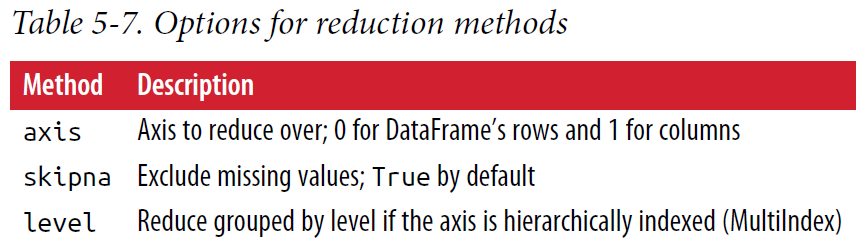

Some methods, like idxmin and idxmax, return indirect statistics like the index value where the minimum or maximum values are attained:

In [204]:
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [205]:
df.idxmax()

one    b
two    d
dtype: object

In [206]:
df.cumsum()

,one,two
a,1.40,NaN
b,8.50,-4.5
c,NaN,NaN
d,9.25,-5.8


Another type of method is neither a reduction nor an accumulation. describe() is one such example, producing multiple summary statistics in one shot:

In [207]:
df.describe()

,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


On non-numeric data, describe produces alternative summary statistics:

In [208]:
obj = pd.Series(['a', 'a', 'b', 'c'] * 4)
obj

0     a
1     a
2     b
3     c
4     a
5     a
6     b
7     c
8     a
9     a
10    b
11    c
12    a
13    a
14    b
15    c
dtype: object

In [209]:
obj.describe()

count     16
unique     3
top        a
freq       8
dtype: object

Full list of summary statistics and related methods -

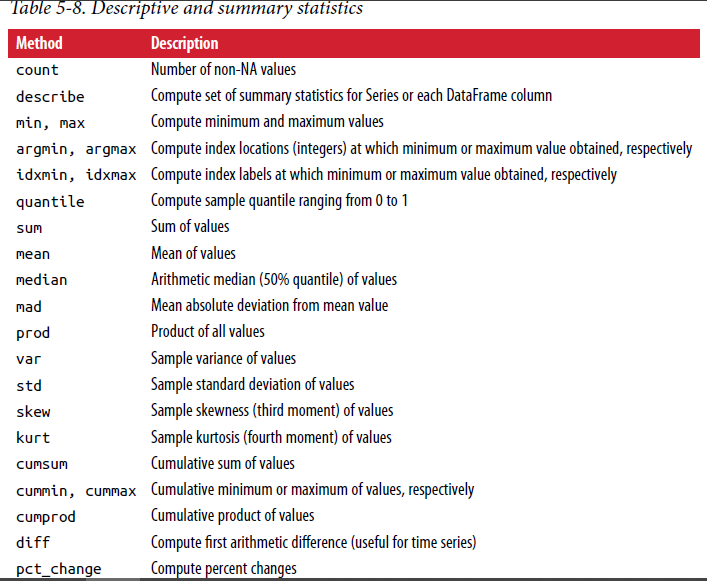

## Correlation and Covariance

Some summary statistics, like correlation and covariance, are computed from pairs of arguments. Let’s consider some DataFrames of stock prices and volumes obtained from Yahoo! Finance using the add-on pandas-datareader package. If you don’t have it installed already, it can be obtained via conda or pip. In jupyter notebook you can use '!' mark before command: 

Using the pandas_datareader module to download some data for a few stock tickers:

In [210]:
import pandas_datareader.data as web
all_data = {ticker: web.get_data_yahoo(ticker) 
            for ticker in ['AAPL', 'IBM', 'MSFT', 'GOOG']}
price = pd.DataFrame({ticker: data['Adj Close'] 
                      for ticker, data in all_data.items()})
volume = pd.DataFrame({ticker: data['Volume'] 
                       for ticker, data in all_data.items()})

compute percent changes of the prices, a time series operation

In [211]:
returns = price.pct_change()

In [212]:
returns.tail()

,AAPL,IBM,MSFT,GOOG
Date,,,,
2021-03-11,0.016503,-0.005709,0.020265,0.029070
2021-03-12,-0.007625,0.003697,-0.005820,-0.024991
2021-03-15,0.024457,0.007601,-0.003987,0.002216
2021-03-16,0.012743,-0.002644,0.012350,0.012596
2021-03-17,-0.006451,0.006160,-0.002819,-0.000688


The corr method of Series computes the correlation of the overlapping, non-NA, aligned-by-index values in two Series. Relatedly, cov computes the covariance:

In [213]:
returns['MSFT'].corr(returns['IBM'])

0.533642150576049

In [214]:
returns['MSFT'].cov(returns['IBM'])

0.00015147643278729938

Since MSFT is a valid Python attribute, we can also select these columns using more concise syntax:

In [215]:
returns.MSFT.corr(returns.IBM)

0.533642150576049

DataFrame’s corr and cov methods, on the other hand, return a full correlation or covariance matrix as a DataFrame, respectively:

In [216]:
returns.corr()

,AAPL,IBM,MSFT,GOOG
AAPL,1.000000,0.447500,0.711825,0.651340
IBM,0.447500,1.000000,0.533642,0.501338
MSFT,0.711825,0.533642,1.000000,0.778916
GOOG,0.651340,0.501338,0.778916,1.000000


In [217]:
returns.cov()

,AAPL,IBM,MSFT,GOOG
AAPL,0.000364,0.000140,0.000235,0.000208
IBM,0.000140,0.000268,0.000151,0.000138
MSFT,0.000235,0.000151,0.000300,0.000226
GOOG,0.000208,0.000138,0.000226,0.000281


Using DataFrame’s corrwith method, you can compute pairwise correlations between a DataFrame’s columns or rows with another Series or DataFrame. Passing a Series returns a Series with the correlation value computed for each column:

In [218]:
returns.corrwith(returns.IBM)

AAPL    0.447500
IBM     1.000000
MSFT    0.533642
GOOG    0.501338
dtype: float64

Passing a DataFrame computes the correlations of matching column names. Here I compute correlations of percent changes with volume:

In [219]:
returns.corrwith(volume)

AAPL   -0.074068
IBM    -0.114667
MSFT   -0.083985
GOOG   -0.134709
dtype: float64

## Unique Values, Value Counts, and Membership
Another class of related methods extracts information about the values contained in a one-dimensional Series. To illustrate these, consider this example:

In [220]:
obj = pd.Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c'])
obj

0    c
1    a
2    d
3    a
4    a
5    b
6    b
7    c
8    c
dtype: object

In [221]:
uniques = obj.unique()
uniques

array(['c', 'a', 'd', 'b'], dtype=object)

In [222]:
uniques.sort()
uniques

array(['a', 'b', 'c', 'd'], dtype=object)

value_counts computes a Series containing value frequencies:

In [223]:
obj.value_counts()

c    3
a    3
b    2
d    1
dtype: int64

The Series is sorted by value in descending order as a convenience. value_counts is also available as a top-level pandas method that can be used with any array or sequence:

In [224]:
obj.values

array(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c'], dtype=object)

In [225]:
pd.value_counts(obj.values, sort=False)

b    2
d    1
a    3
c    3
dtype: int64

isin performs a vectorized set membership check and can be useful in filtering a dataset down to a subset of values in a Series or column in a DataFrame:

In [226]:
obj

0    c
1    a
2    d
3    a
4    a
5    b
6    b
7    c
8    c
dtype: object

In [227]:
mask = obj.isin(['b','c'])
mask

0     True
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
dtype: bool

In [228]:
obj[mask]

0    c
5    b
6    b
7    c
8    c
dtype: object

Related to isin is the Index.get_indexer method, which gives you an index array from an array of possibly non-distinct values into another array of distinct values:

In [229]:
to_match = pd.Series(['c', 'a', 'b', 'b', 'c', 'a'])
to_match

0    c
1    a
2    b
3    b
4    c
5    a
dtype: object

In [230]:
unique_vals = pd.Series(['c', 'b', 'a'])
unique_vals

0    c
1    b
2    a
dtype: object

In [231]:
pd.Index(unique_vals)
# unique_vals.index  # RangeIndex(start=0, stop=3, step=1)

Index(['c', 'b', 'a'], dtype='object')

In [232]:
pd.Index(unique_vals).get_indexer(to_match)

array([0, 2, 1, 1, 0, 2], dtype=int64)

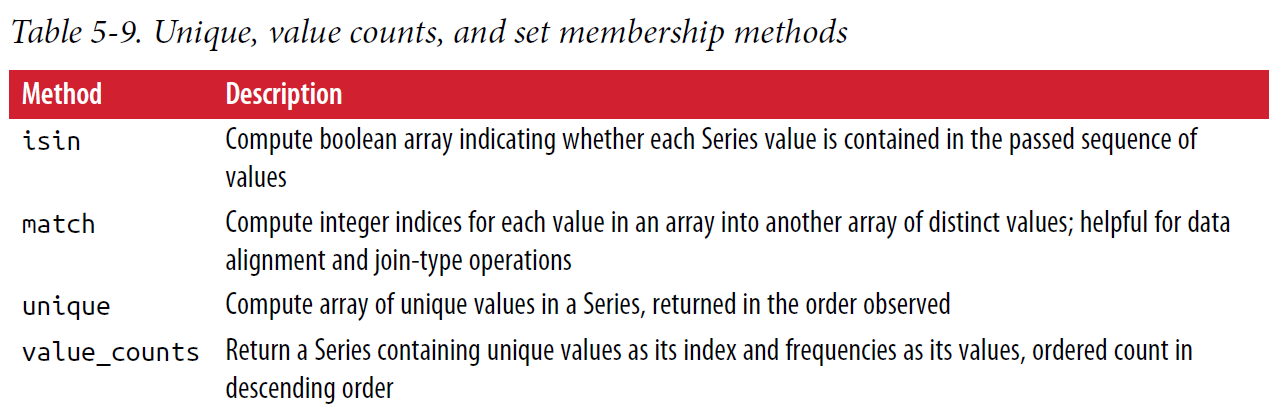

In some cases, you may want to compute a histogram on multiple related columns in a DataFrame. Here’s an example:

In [233]:
data = pd.DataFrame({'Qu1': [1, 3, 4, 3, 4],
                     'Qu2': [2, 3, 1, 2, 3],
                     'Qu3': [1, 5, 2, 4, 4]}, index= list('abcde'))
data

,Qu1,Qu2,Qu3
a,1,2,1
b,3,3,5
c,4,1,2
d,3,2,4
e,4,3,4


Passing pandas.value_counts to this DataFrame’s apply function gives:

In [234]:
result = data.apply(pd.value_counts).fillna(0)
result

,Qu1,Qu2,Qu3
1,1.0,1.0,1.0
2,0.0,2.0,1.0
3,2.0,2.0,0.0
4,2.0,0.0,2.0
5,0.0,0.0,1.0


Here, the row labels in the result are the distinct values occurring in all of the columns. The values are the respective counts of these values in each column.

Aggregated Points -   
+ the column returned from indexing a DataFrame is a view on the underlying data, not a copy. Thus, any in-place modifications to the Series will be reflected in the DataFrame. The column can be explicitly copied with the Series’s copy method.

#### *Note - Most of the contents like images, examples, statements, etc in my notebooks / notes belongs to author "Wes McKinney" of book "Python for Data Analysis". I have collected / integrated them for study purpose and I don't own it.*